# Red wine quality


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# check distribution of numerical columns

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# 2. Missing value  imputation
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory data analysis

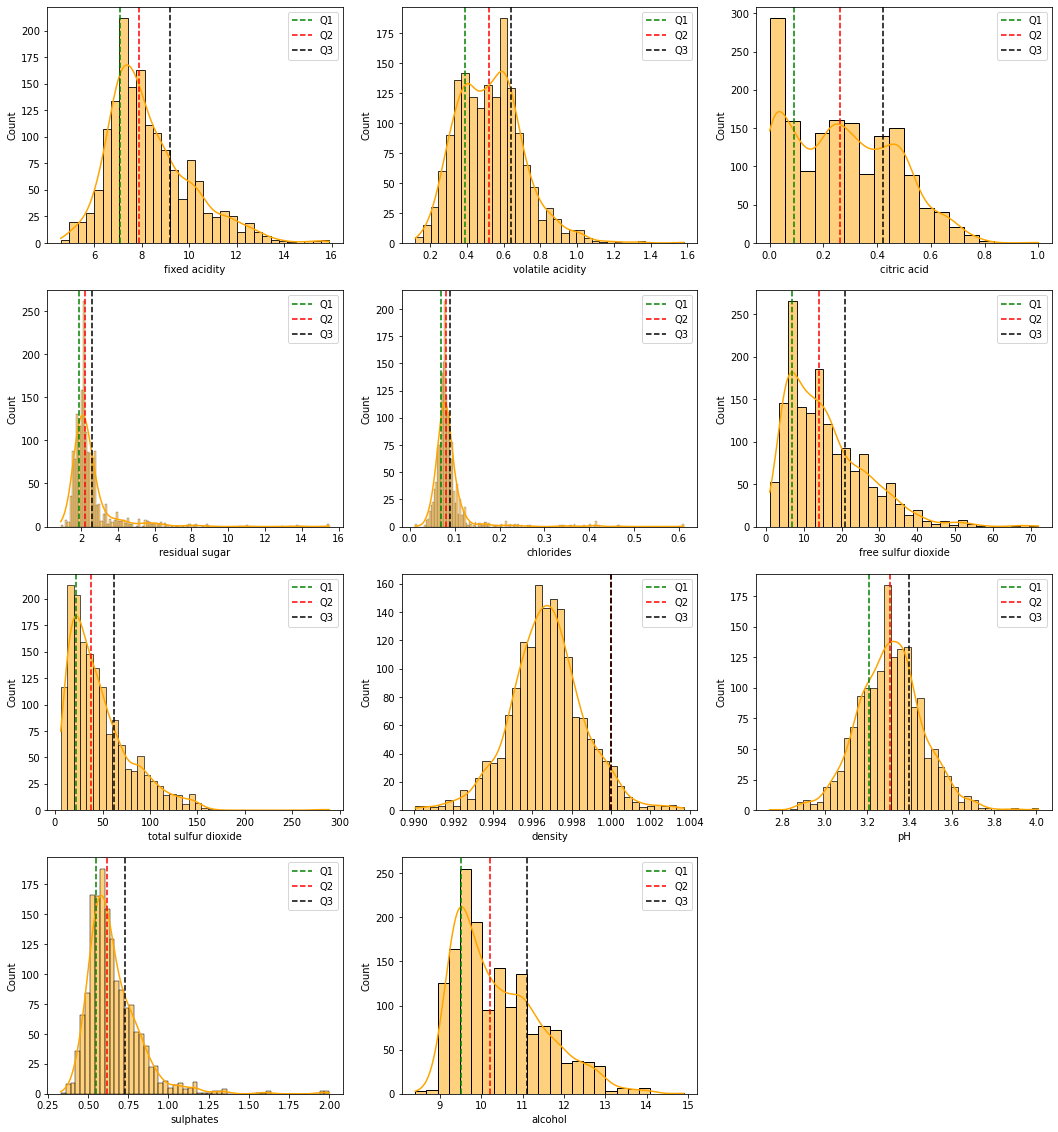

In [11]:
feature_ = wine_df.columns[:-1]
def get_percentile(feature,q_range):
    dist = wine_df[feature].describe()[str(q_range) + '%']
    return round(dist,2)
def render_counterplot():
    fig= plt.figure(figsize=(18,20))
    for column,feature in enumerate(feature_):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data=wine_df, x=feature, kde=True,color='orange')
        plt.axvline(q1,linestyle='--',color='green',label='Q1')
        plt.axvline(q2,linestyle='--',color='red',label='Q2')
        plt.axvline(q3,linestyle='--',color='black',label='Q3')
        plt.legend()
    plt.show()
render_counterplot()

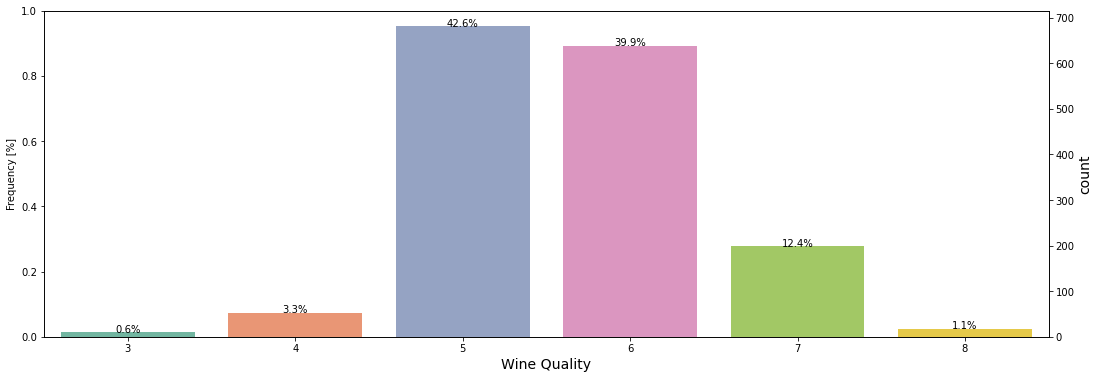

In [21]:
plt.figure(figsize=(18,6))

ax1= sns.countplot(x='quality',data=wine_df, palette='Set2')
plt.xlabel('Wine Quality', fontsize=14)
plt.ylabel('count', fontsize=14)

ax2 = ax1.twinx()
ax2.yaxis.tick_left()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(wine_df)),(x.mean(),y),ha='center')

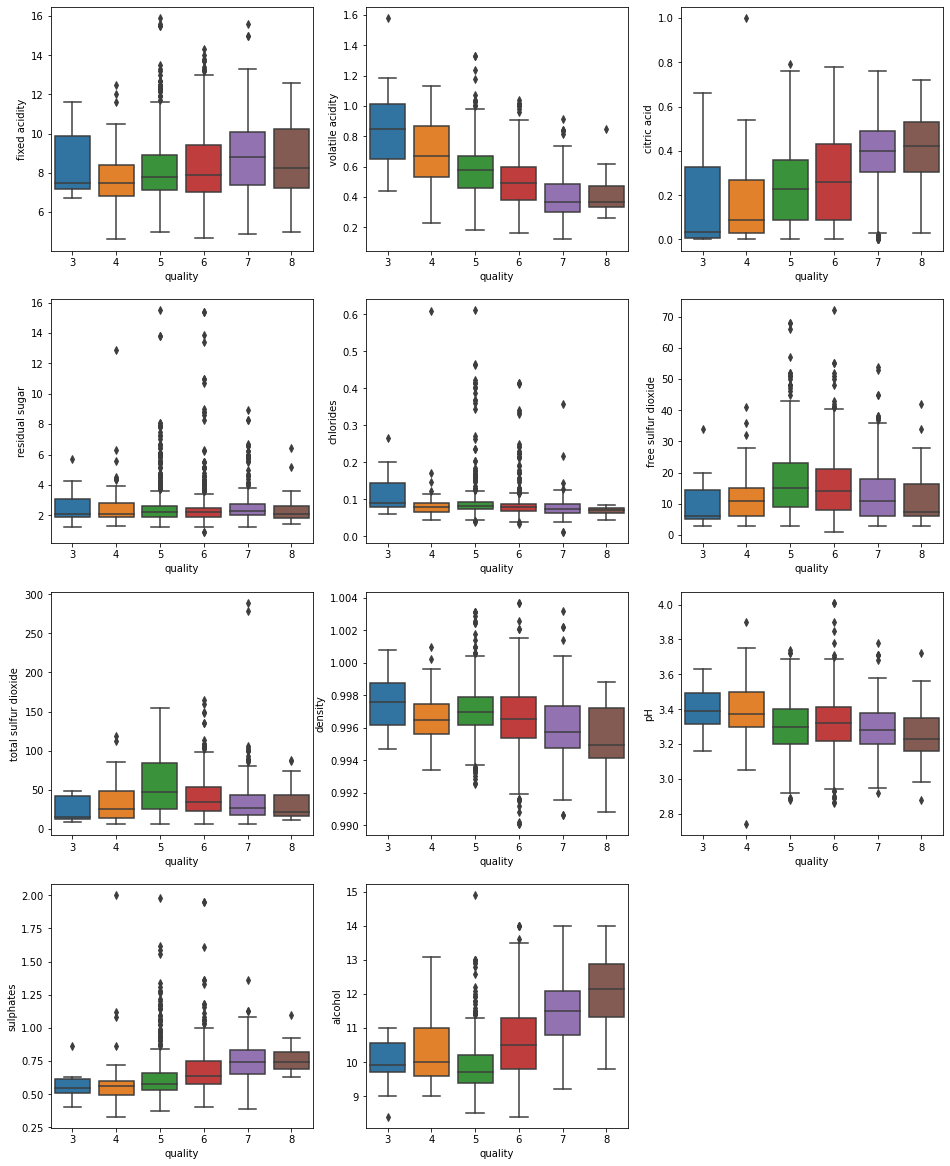

In [23]:
features_ = wine_df.columns.values[:-1]
fig= plt.figure(figsize=(16,26))
for column,feature in enumerate(features_):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=wine_df,x='quality',y=feature)
plt.show()

# Feature engineering

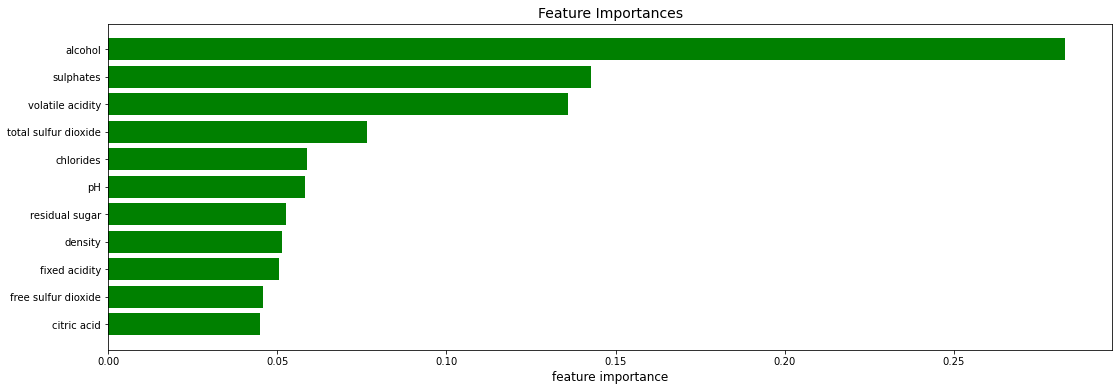

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1, max_depth=12)

x = wine_df.drop(['quality'],axis=1)

rf.fit(x,wine_df.quality)

# store importance and feature names
features = wine_df.columns
importances= rf.feature_importances_
sorted_index = np.argsort(importances)[:]

plt.figure(figsize=(18,6))
plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(sorted_index)),importances[sorted_index],color='green',align='center')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])
plt.xlabel('feature importance',fontsize=12)
plt.show()

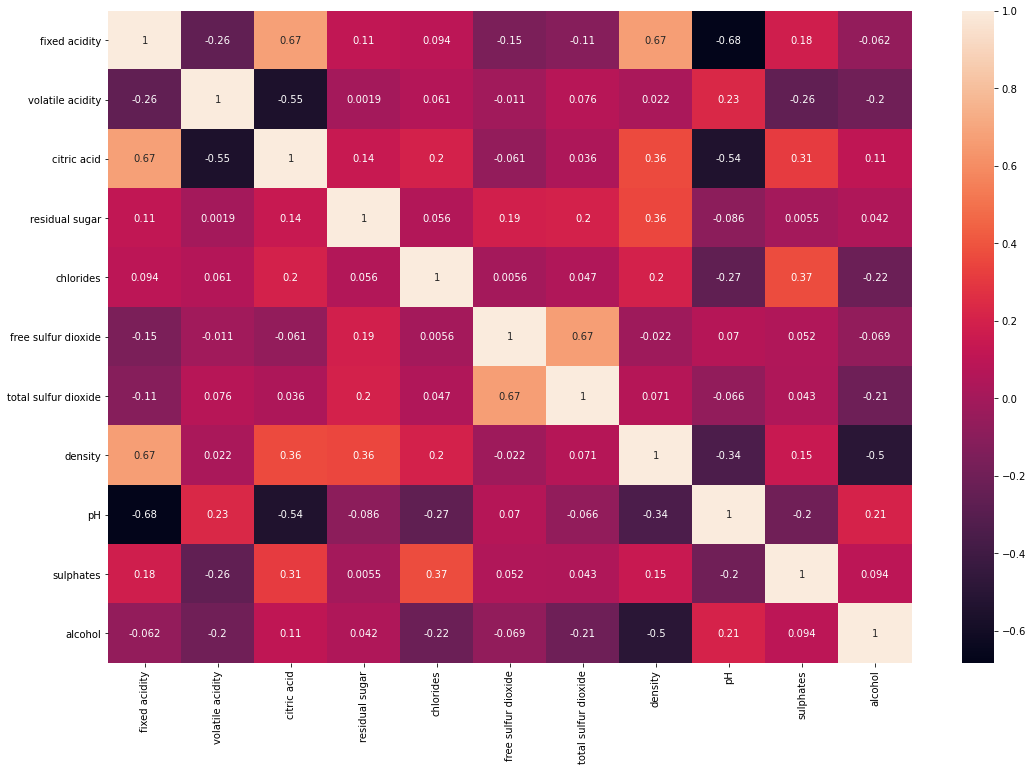

In [27]:
# check for multicollinearity

plt.figure(figsize=(18,12))

sns.heatmap(x.corr(),annot=True)
plt.show()

In [28]:
wine_df.drop(['fixed acidity','free sulfur dioxide'],axis=1,inplace= True)

#Handle Imbalanced dataset

In [39]:
from imblearn.over_sampling import SMOTE
x = wine_df.drop('quality', axis = 'columns')
y = wine_df['quality']
smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x,y)


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sm[x_sm.columns] = scaler.fit_transform(x_sm[x_sm.columns])

In [50]:
x_sm

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.205897,-1.187401,-0.540452,-0.444974,-0.164471,0.480530,1.109967,-0.443406,-0.907517
1,0.862413,-1.187401,-0.019152,-0.002678,0.909489,-0.077320,-0.924208,0.324788,-0.501970
2,0.424736,-0.986920,-0.242566,-0.123304,0.486414,0.034250,-0.530497,0.132740,-0.501970
3,-1.325971,1.619328,-0.540452,-0.465078,0.681679,0.592100,-1.186683,-0.315373,-0.501970
4,0.205897,-1.187401,-0.540452,-0.444974,-0.164471,0.480530,1.109967,-0.443406,-0.907517
...,...,...,...,...,...,...,...,...,...
2265,3.076786,-1.176048,-0.416813,0.647046,-0.967019,-1.136988,1.081509,-1.300901,0.504194
2266,1.813674,-0.075446,-0.391509,1.354860,-0.874931,-0.043371,0.034202,-0.801017,-0.534340
2267,2.130077,-0.295083,-0.391509,1.241587,-0.895305,-0.274860,0.233729,-0.932695,-0.307658
2268,-0.630823,0.745917,-0.856564,1.142319,0.240705,0.606324,0.224807,1.294295,-0.408854


In [166]:
## need to run again for 2nd and 3 rd model as y_test was manipulated 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [150]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [148]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=9,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [167]:
## need to run again for 2nd and 3 rd model as y_test was manipulated 
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

In [153]:
y_train

array([2, 0, 3, ..., 3, 3, 2], dtype=int64)

In [168]:
## need to run again for 2nd and 3 rd model as y_test was manipulated 
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [155]:
y_train

,0
0,2
1,0
2,3
3,2
4,0
...,...
1811,0
1812,2
1813,3
1814,3


In [169]:
## need to run again for 2nd and 3 rd model as y_test was manipulated 
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)


In [157]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [123]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [124]:
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
57/57 [==============================] - 1s 2ms/step - loss: 1.5562 - accuracy: 0.4080
Epoch 2/400
57/57 [==============================] - 0s 2ms/step - loss: 0.9876 - accuracy: 0.6284
Epoch 3/400
57/57 [==============================] - 0s 2ms/step - loss: 0.8906 - accuracy: 0.6509
Epoch 4/400
57/57 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.6824
Epoch 5/400
57/57 [==============================] - 0s 2ms/step - loss: 0.8035 - accuracy: 0.6713
Epoch 6/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.6880
Epoch 7/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.6908
Epoch 8/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.6955
Epoch 9/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.6912
Epoch 10/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.7186
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8225
Epoch 84/400
57/57 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.8039
Epoch 85/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7832
Epoch 86/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8013
Epoch 87/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4761 - accuracy: 0.8011
Epoch 88/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.8071
Epoch 89/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7979
Epoch 90/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8110
Epoch 91/400
57/57 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8241
Epoch 92/400
57/57 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8287
Epoch 93/400


57/57 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8940
Epoch 246/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8929
Epoch 247/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8837
Epoch 248/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8834
Epoch 249/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.8952
Epoch 250/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.8980
Epoch 251/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8861
Epoch 252/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8923
Epoch 253/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8848
Epoch 254/400
57/57 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.8996
Epoc

In [125]:
y_pred = model.predict_classes(x_test)

In [126]:
y_test

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [127]:
y_test = np.argmax(y_test,axis=1)

In [128]:
y_test

array([2, 0, 0, 4, 3, 2, 3, 3, 3, 2, 3, 0, 0, 4, 2, 0, 0, 3, 4, 3, 3, 3,
       0, 2, 3, 2, 0, 2, 0, 0, 3, 2, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 3, 2, 4, 3, 3, 3, 3, 3, 2, 1, 2, 3,
       3, 3, 2, 3, 0, 3, 4, 2, 0, 2, 0, 0, 0, 3, 5, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 3, 2, 0, 0, 3, 0, 3, 2, 4, 2, 0, 2, 3, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 0, 3, 3, 0, 2, 3, 2, 2, 3, 0, 0, 2, 2, 0, 3, 0, 0, 2, 0, 4,
       3, 4, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 2, 3, 0, 2, 2, 2, 3, 0, 0, 2,
       3, 2, 3, 4, 2, 2, 2, 0, 0, 3, 2, 4, 0, 3, 3, 0, 3, 4, 2, 2, 1, 2,
       0, 1, 0, 3, 0, 2, 0, 0, 1, 3, 4, 3, 3, 0, 3, 0, 4, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 1, 0, 3, 3, 2, 4, 2, 3, 0, 4, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 0, 2, 3, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 4, 4, 2, 2, 0,
       3, 3, 2, 2, 2, 0, 0, 2, 0, 4, 0, 0, 3, 3, 2, 2, 3, 2, 0, 4, 0, 2,
       3, 0, 3, 0, 0, 0, 3, 0, 4, 0, 3, 0, 0, 0, 3, 3, 5, 0, 3, 2, 5, 3,
       2, 3, 2, 5, 2, 0, 3, 0, 0, 2, 0, 3, 3, 3, 2,

In [129]:
y_pred

array([2, 0, 0, 4, 3, 2, 2, 3, 3, 2, 3, 0, 0, 4, 2, 0, 0, 3, 3, 3, 3, 3,
       0, 2, 3, 3, 0, 2, 0, 0, 2, 3, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2,
       2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 3, 2, 4, 3, 4, 2, 2, 3, 3, 2, 3, 2,
       2, 3, 3, 3, 0, 3, 3, 2, 0, 2, 0, 0, 0, 2, 4, 2, 0, 3, 0, 2, 2, 0,
       0, 4, 2, 2, 0, 0, 2, 0, 1, 2, 4, 2, 0, 2, 3, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 0, 2, 3, 0, 3, 3, 2, 2, 3, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 4,
       3, 4, 0, 2, 0, 0, 3, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 2, 3, 0, 0, 2,
       3, 2, 3, 3, 3, 3, 2, 0, 0, 3, 2, 4, 0, 3, 2, 0, 3, 2, 2, 2, 2, 2,
       0, 3, 0, 4, 0, 2, 0, 0, 3, 3, 4, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 2, 0, 2, 3, 2, 4, 3, 3, 0, 4, 2, 4, 2, 2, 2, 2, 3, 3,
       3, 0, 2, 3, 0, 2, 2, 0, 3, 3, 1, 4, 0, 2, 4, 3, 2, 4, 4, 3, 2, 0,
       2, 3, 3, 2, 2, 0, 0, 2, 0, 4, 0, 0, 3, 2, 2, 4, 3, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 4, 3, 0, 3, 2, 3, 3,
       2, 3, 2, 3, 2, 0, 3, 0, 0, 2, 0, 3, 3, 3, 2,

In [131]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

75.77092511013215

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       136
           1       0.00      0.00      0.00         8
           2       0.72      0.73      0.73       141
           3       0.63      0.65      0.64       130
           4       0.59      0.59      0.59        34
           5       0.00      0.00      0.00         5

    accuracy                           0.76       454
   macro avg       0.49      0.50      0.49       454
weighted avg       0.74      0.76      0.75       454



In [134]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=9,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))

model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [135]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [142]:
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
57/57 [==============================] - 1s 2ms/step - loss: 1.6463 - accuracy: 0.3291
Epoch 2/400
57/57 [==============================] - 0s 2ms/step - loss: 1.1617 - accuracy: 0.6068
Epoch 3/400
57/57 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.6082
Epoch 4/400
57/57 [==============================] - 0s 1ms/step - loss: 0.9212 - accuracy: 0.6656
Epoch 5/400
57/57 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.6687
Epoch 6/400
57/57 [==============================] - 0s 1ms/step - loss: 0.8591 - accuracy: 0.6678
Epoch 7/400
57/57 [==============================] - 0s 3ms/step - loss: 0.7908 - accuracy: 0.6944
Epoch 8/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.6954
Epoch 9/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7796 - accuracy: 0.6835
Epoch 10/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7739 - accuracy: 0.6943
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7838
Epoch 84/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7682
Epoch 85/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5564 - accuracy: 0.7486
Epoch 86/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5100 - accuracy: 0.7889
Epoch 87/400
57/57 [==============================] - 0s 1ms/step - loss: 0.4929 - accuracy: 0.7862
Epoch 88/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7837
Epoch 89/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7745
Epoch 90/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5068 - accuracy: 0.7771
Epoch 91/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5104 - accuracy: 0.7923
Epoch 92/400
57/57 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7935
Epoch 93/400


57/57 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8547
Epoch 245/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8414
Epoch 246/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8307
Epoch 247/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8519
Epoch 248/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3644 - accuracy: 0.8462
Epoch 249/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8376
Epoch 250/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8536
Epoch 251/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3780 - accuracy: 0.8432
Epoch 252/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8386
Epoch 253/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8552
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8469
Epoch 326/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8551
Epoch 327/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8593
Epoch 328/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8627
Epoch 329/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8517
Epoch 330/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8650
Epoch 331/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8454
Epoch 332/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8553
Epoch 333/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8611
Epoch 334/400
57/57 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8603
Epoc

In [143]:
y_pred = model.predict_classes(x_test)

In [144]:
y_test = np.argmax(y_test,axis=1)

In [145]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

74.66960352422907

In [151]:

model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=9,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(256,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [158]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [159]:
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
57/57 [==============================] - 1s 3ms/step - loss: 1.4923 - accuracy: 0.3882
Epoch 2/400
57/57 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.6284
Epoch 3/400
57/57 [==============================] - 0s 5ms/step - loss: 0.8549 - accuracy: 0.6714
Epoch 4/400
57/57 [==============================] - 0s 4ms/step - loss: 0.8354 - accuracy: 0.6595
Epoch 5/400
57/57 [==============================] - 0s 3ms/step - loss: 0.7706 - accuracy: 0.6995
Epoch 6/400
57/57 [==============================] - 0s 3ms/step - loss: 0.7500 - accuracy: 0.6990
Epoch 7/400
57/57 [==============================] - 0s 3ms/step - loss: 0.7523 - accuracy: 0.6864
Epoch 8/400
57/57 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.7021
Epoch 9/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.7173
Epoch 10/400
57/57 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.7191
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8669
Epoch 163/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8577
Epoch 164/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8758
Epoch 165/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8719
Epoch 166/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8780
Epoch 167/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8457
Epoch 168/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8452
Epoch 169/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8720
Epoch 170/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8606
Epoch 171/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8633
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8929
Epoch 323/400
57/57 [==============================] - 0s 4ms/step - loss: 0.2246 - accuracy: 0.9213
Epoch 324/400
57/57 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.9031
Epoch 325/400
57/57 [==============================] - 0s 5ms/step - loss: 0.2368 - accuracy: 0.9156
Epoch 326/400
57/57 [==============================] - 0s 4ms/step - loss: 0.2325 - accuracy: 0.9057
Epoch 327/400
57/57 [==============================] - 0s 4ms/step - loss: 0.2523 - accuracy: 0.9056
Epoch 328/400
57/57 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.8991
Epoch 329/400
57/57 [==============================] - 0s 3ms/step - loss: 0.2310 - accuracy: 0.9040
Epoch 330/400
57/57 [==============================] - 0s 4ms/step - loss: 0.2537 - accuracy: 0.8984
Epoch 331/400
57/57 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9104
Epoc

In [163]:
y_pred = model.predict_classes(x_test)

In [170]:
y_test = np.argmax(y_test,axis=1)

In [171]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

76.2114537444934

In [173]:
y_pred

array([2, 0, 0, 4, 3, 3, 3, 3, 3, 2, 4, 0, 0, 4, 2, 0, 0, 3, 3, 3, 2, 4,
       0, 2, 2, 3, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2,
       2, 3, 2, 3, 2, 0, 0, 0, 0, 0, 3, 2, 4, 3, 3, 2, 3, 2, 2, 2, 3, 4,
       2, 3, 3, 4, 0, 4, 3, 2, 0, 2, 0, 0, 0, 2, 4, 2, 0, 3, 0, 2, 2, 0,
       0, 4, 2, 2, 0, 0, 2, 0, 1, 2, 4, 2, 0, 2, 3, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 0, 2, 3, 0, 3, 3, 2, 2, 3, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 4,
       3, 4, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 2, 3, 0, 0, 2, 2, 3, 0, 0, 2,
       3, 2, 3, 3, 2, 3, 2, 0, 0, 3, 2, 4, 0, 3, 2, 0, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 4, 0, 2, 0, 0, 3, 3, 4, 3, 3, 0, 4, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 0, 3, 2, 0, 2, 3, 2, 4, 3, 3, 0, 4, 2, 3, 2, 2, 2, 2, 3, 3,
       3, 0, 2, 4, 0, 3, 2, 0, 3, 3, 1, 4, 0, 2, 4, 3, 2, 4, 4, 3, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 4, 0, 0, 3, 2, 2, 3, 3, 2, 0, 3, 0, 2,
       2, 0, 3, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 3, 2, 3, 2,
       2, 3, 2, 4, 2, 0, 3, 0, 0, 2, 0, 2, 3, 2, 2,

In [176]:
y_pred = pd.DataFrame(y_pred.reshape(len(y_test),1))

In [177]:
y_pred

,0
0,2
1,0
2,0
3,4
4,3
...,...
449,3
450,3
451,3
452,0


In [178]:
x_test

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
188,-0.523564,0.466564,-0.465981,-0.284139,3.382851,-0.077320,-0.924208,-0.507422,-0.806130
2083,0.661535,-1.102474,-0.336200,-0.346412,-0.870501,-0.472469,1.452634,-0.083306,-0.233729
1675,1.121868,-0.188544,0.558413,0.819431,-0.788883,0.446398,0.643037,-0.337108,-0.537917
1089,-0.851822,1.519087,-0.838338,-0.062991,0.063339,0.229498,-2.105342,0.836917,-0.400583
1378,-0.705929,-0.435599,-0.465981,-0.404765,-0.359736,-0.473394,-0.333641,-0.763486,-0.400583
...,...,...,...,...,...,...,...,...,...
1580,-1.070660,0.466564,-0.168095,-0.605809,-0.424825,-1.248806,0.125689,-0.187341,1.627151
1047,-0.778875,-0.335358,-0.614924,-0.324348,0.388781,-0.333931,0.978730,0.068724,0.106350
892,-0.705929,-0.034637,-0.540452,-0.324348,-0.685179,0.447059,-0.792971,0.132740,-1.008904
1674,0.794473,-0.823396,2.151597,-0.202354,-0.812008,0.674595,0.307178,-0.663259,-0.190269


In [ ]:
## do concatenation to get more clear view.